In [ ]:
# DataFlair background removal
# import necessary packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# store background images in a list
%cd /content/drive/MyDrive/Colab/Image_DL/removeBackground
# image_path = 'images'
# images = os.listdir(image_path)
# image_index= 0
# bg_image = cv2.imread(image_path+'/'+images[image_index])

/content/drive/MyDrive/Colab/Image_DL/removeBackground


In [ ]:
# initialize mediapipe
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

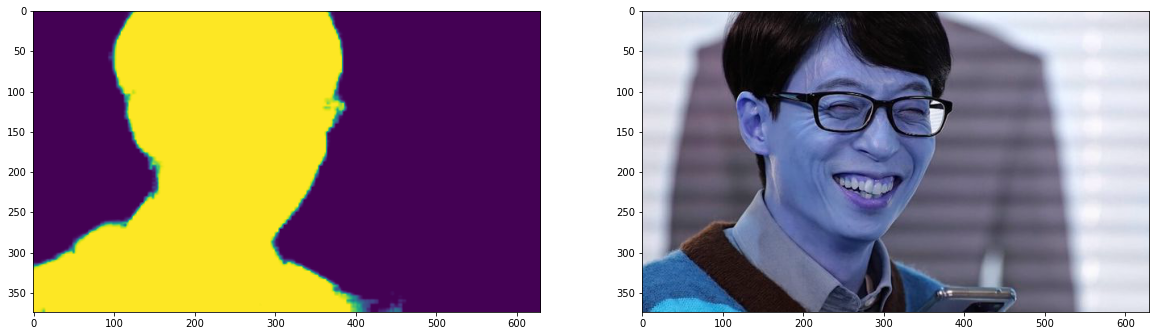

In [45]:
# masking 할 인물 이미지 불러오기

for i in range(1,6,1):
    img = '/content/drive/MyDrive/Colab/Image_DL/removeBackground/images/test{}.png'.format(i)

     = cv2.imread(img, cv2.COLOR_BGR2RGB)

    # flip the frame to horizontal direction
    img = cv2.flip(img_pil, 1)
    
    # img1 ... img5
    globals()['img'+str(i)] = img
    
    RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # get the result
    results = selfie_segmentation.process(RGB)

    # extract segmented mask
    # mask1 ... mask5
    globals()['mask'+str(i)] = results.segmentation_mask

# show outputs
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask1)
plt.subplot(1,2,2)
plt.imshow(img1)

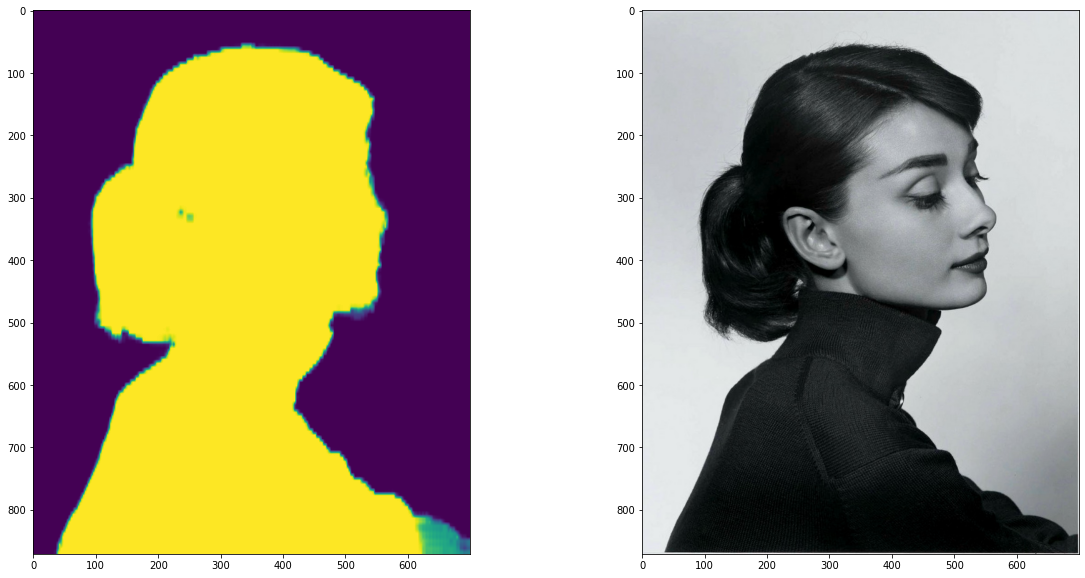

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask2)
plt.subplot(1,2,2)
plt.imshow(img2)

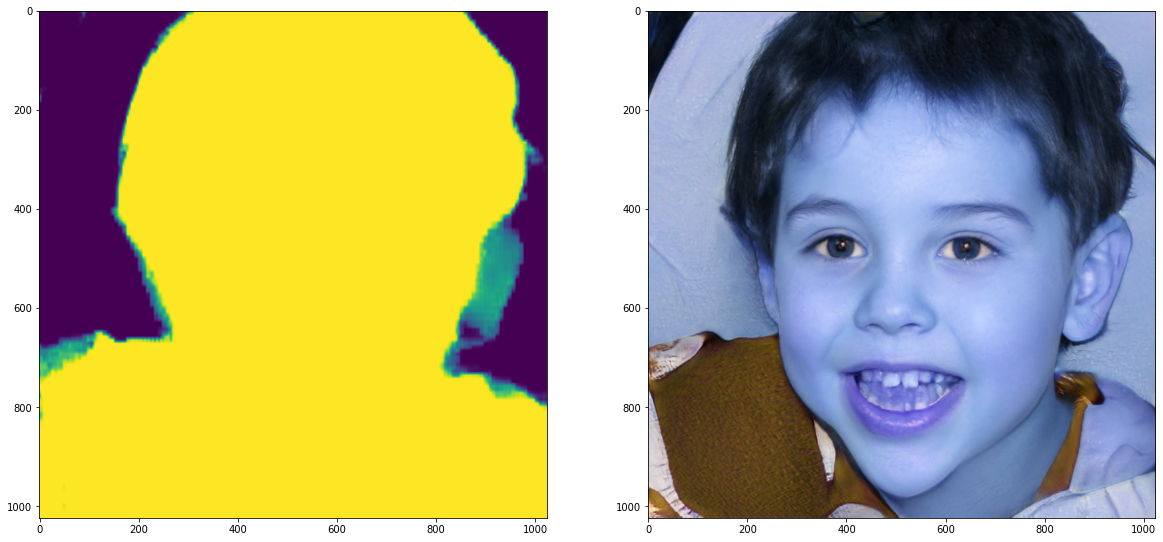

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask3)
plt.subplot(1,2,2)
plt.imshow(img3)

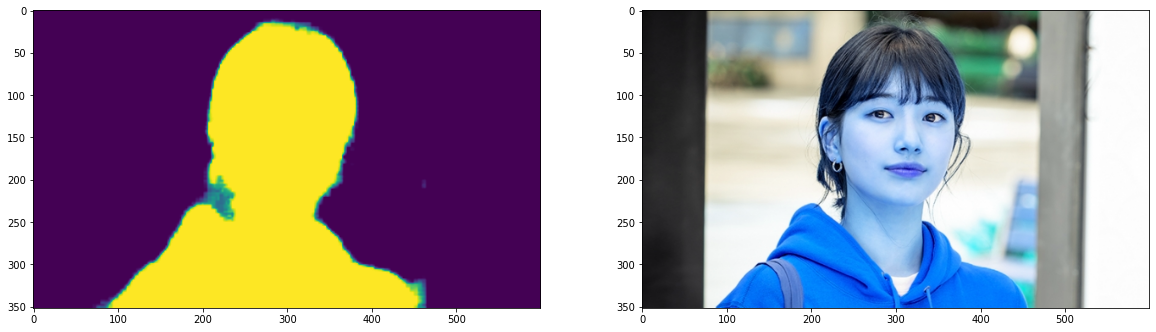

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask4)
plt.subplot(1,2,2)
plt.imshow(img4)

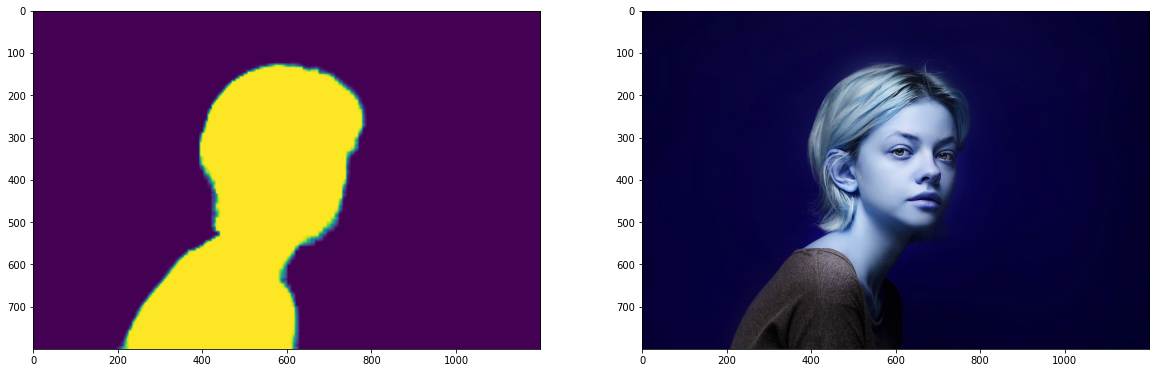

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask5)
plt.subplot(1,2,2)
plt.imshow(img5)

In [ ]:
img5.shape

(800, 1200, 3)

In [ ]:
mask5.shape

(800, 1200)

In [ ]:
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

In [ ]:
img5.shape

(800, 1200)

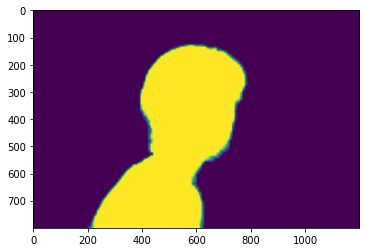

In [ ]:
plt.imshow(mask5)

In [ ]:
import numpy as np
mask5=mask5.astype(np.uint8)

In [ ]:
mask5.dtype

dtype('uint8')

In [ ]:
img5.dtype

dtype('uint8')

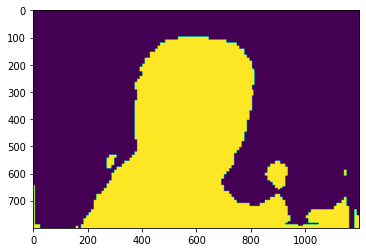

In [ ]:
ret, thresh1 = cv2.threshold(mask5, 0, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)

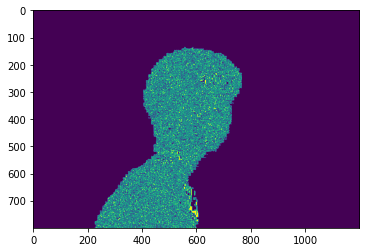

In [ ]:
bit = cv2.bitwise_and(img5, mask5)
plt.imshow(bit)

In [ ]:
# AI Hub 인물 사진 저장 경로를 List로 받아오기
img_pList = os.listdir('path')

In [ ]:
# mask img 저장 경로
result_dir = ''

for img_p in img_pList:
    # masking 할 인물 이미지 불러오기
    img_pil = cv2.imread(img_p, cv2.COLOR_BGR2RGB)

    # flip the frame to horizontal direction
    img = cv2.flip(img_pil, 1)

    RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # get the result
    results = selfie_segmentation.process(RGB)

    # extract segmented mask
    mask = results.segmentation_mask

    # show outputs
    # plt.figure(figsize=(20,10))
    # plt.subplot(1,2,1)
    # plt.imshow(mask)
    # plt.subplot(1,2,2)
    # plt.imshow(img)

    # save mask file
    plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), mask)

In [40]:
bgi_path = '/content/drive/MyDrive/Colab/Image_DL/removeBackground/images/background.png'

In [41]:
bg_image = cv2.imread(bgi_path)

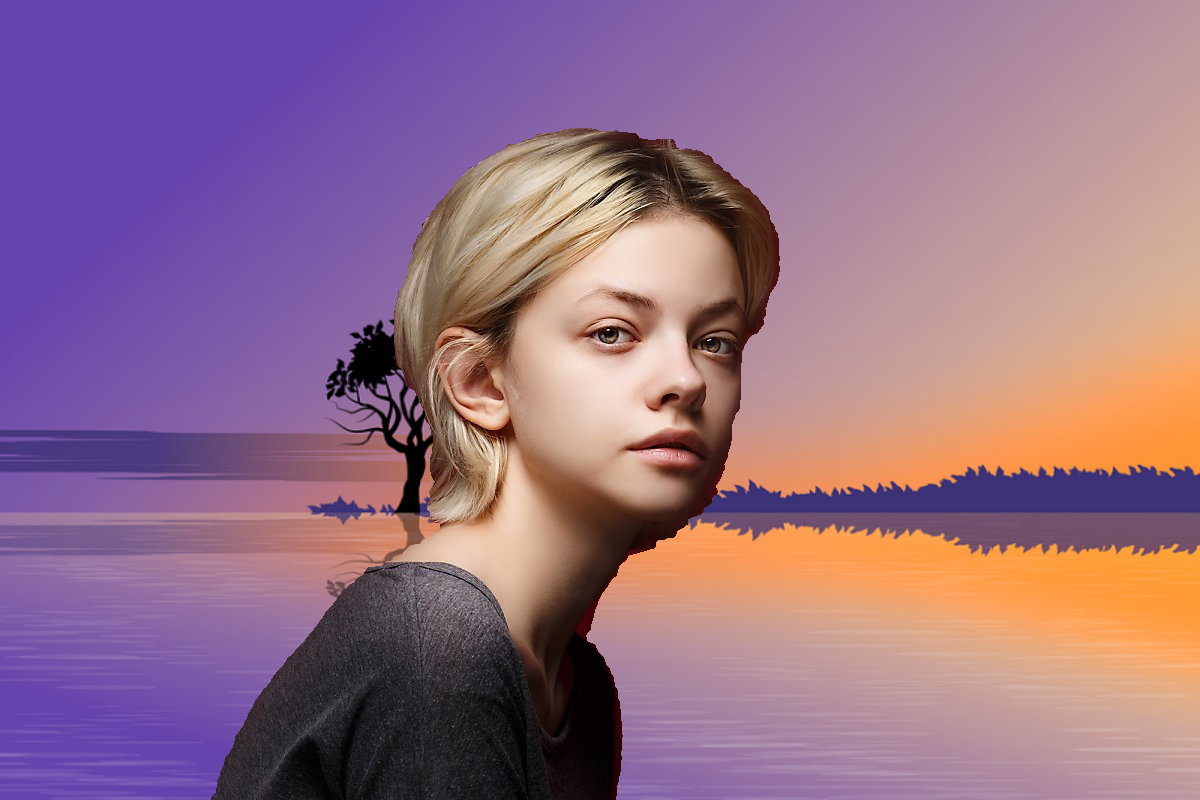

In [50]:
height , width, channel = img5.shape
# mask에서 condition이 적용되는 곳을 True 반환, 나머지를 False 반환
condition = np.stack(
  (results5.segmentation_mask,) * 3, axis=-1) > 0.5

# 배경 이미지 크기를 원본 이미지 크기와 동일하게 맞춰 주는 코드
bg_image = cv2.resize(bg_image, (width, height))

# condition을 이용하여 출력 이미지 생성 (condition, 원본 이미지, 배경 이미지)
output_image = np.where(condition, img5, bg_image)

cv2.imshow(output_image)